In [3]:
"""
===================================================
Feature selection using SelectFromModel and LassoCV
===================================================

Use SelectFromModel meta-transformer along with Lasso to select the best
couple of features from the diabetes dataset.

Since the L1 norm promotes sparsity of features we might be interested in
selecting only a subset of the most interesting features from the dataset. This
example shows how to select two the most interesting features from the diabetes
dataset.

Diabetes dataset consists of 10 variables (features) collected from 442
diabetes patients. This example shows how to use SelectFromModel and LassoCv to
find the best two features predicting disease progression after one year from
the baseline.

Authors: `Manoj Kumar <mks542@nyu.edu>`_,
`Maria Telenczuk <https://github.com/maikia>`_

License: BSD 3 clause
"""

print(__doc__)

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_diabetes
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV


Feature selection using SelectFromModel and LassoCV

Use SelectFromModel meta-transformer along with Lasso to select the best
couple of features from the diabetes dataset.

Since the L1 norm promotes sparsity of features we might be interested in
selecting only a subset of the most interesting features from the dataset. This
example shows how to select two the most interesting features from the diabetes
dataset.

Diabetes dataset consists of 10 variables (features) collected from 442
diabetes patients. This example shows how to use SelectFromModel and LassoCv to
find the best two features predicting disease progression after one year from
the baseline.

Authors: `Manoj Kumar <mks542@nyu.edu>`_,
`Maria Telenczuk <https://github.com/maikia>`_

License: BSD 3 clause



In [4]:
# %%
# Load the data
# ---------------------------------------------------------
#
# First, let's load the diabetes dataset which is available from within
# sklearn. Then, we will look what features are collected for the diabates
# patients:

diabetes = load_diabetes()

X = diabetes.data
y = diabetes.target

feature_names = diabetes.feature_names
print(feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [5]:
# %%
# Find importance of the features
# ---------------------------------------------------------
#
# To decide on the importance of the features we are going to use LassoCV
# estimator. The features with the highest absolute `coef_` value are
# considered the most important

clf = LassoCV().fit(X, y)
importance = np.abs(clf.coef_)
print(importance)

[  6.49684455 235.99640534 521.73854261 321.06689245 569.4426838
 302.45627915   0.         143.6995665  669.92633112  66.83430445]


In [6]:
# %%
# Select from the model features with the higest score
# ---------------------------------------------------------
#
# Now we want to select the two features which are the most important.
# SelectFromModel() allows for setting the threshold. Only the features with
# the `coef_` higher than the threshold will remain. Here, we want to set the
# threshold slightly above the third highest `coef_` calculated by LassoCV()
# from our data.

idx_third = importance.argsort()[-3]
threshold = importance[idx_third] + 0.01

idx_features = (-importance).argsort()[:2]
name_features = np.array(feature_names)[idx_features]
print('Selected features: {}'.format(name_features))

sfm = SelectFromModel(clf, threshold=threshold)
sfm.fit(X, y)
X_transform = sfm.transform(X)

n_features = sfm.transform(X).shape[1]

Selected features: ['s5' 's1']


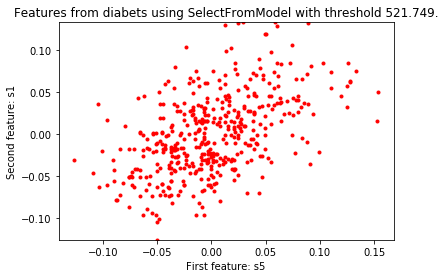

In [7]:

# %%
# Plot the two most important features
# ---------------------------------------------------------
#
# Finally we will plot the selected two features from the data.

plt.title(
    "Features from diabets using SelectFromModel with "
    "threshold %0.3f." % sfm.threshold)
feature1 = X_transform[:, 0]
feature2 = X_transform[:, 1]
plt.plot(feature1, feature2, 'r.')
plt.xlabel("First feature: {}".format(name_features[0]))
plt.ylabel("Second feature: {}".format(name_features[1]))
plt.ylim([np.min(feature2), np.max(feature2)])
plt.show()